In [ ]:
#Importing keras libraries and packages

from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import MaxPooling2D

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
#step7 Fitting CNN to images

train_dir=r'/content/drive/MyDrive/Multiclass Image/train'

validation_dir=r'/content/drive/MyDrive/Multiclass Image/val'

test_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)


In [ ]:
train_datagen = train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)



train_generator= train_datagen.flow_from_directory(train_dir,
                                  target_size=(150,150),batch_size=20,class_mode='categorical')

val_generator = val_datagen.flow_from_directory(validation_dir,
                                  target_size=(150,150),batch_size=20,class_mode='categorical')

Found 4136 images belonging to 8 classes.
Found 1376 images belonging to 8 classes.


In [ ]:
import  matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.utils import to_categorical
import numpy as np
import pandas as pd
import random
import cv2
import os
from PIL import Image

In [ ]:
from keras.layers import *

In [ ]:
def plots(ims,figsize=(16,16),rows=4,interp=False,titles=None):
  f = plt.figure(figsize=figsize)
  cols =len(ims)//rows if len(ims)%2 ==0 else len(ims)//rows +1
  for i in range (len(ims)):
    sp= f.add_subplot(rows,cols,i+1)
    sp.axis('Off')
    sp.set_title(class_names[titles[i].tolist().index(1)],fontsize=16)
    plt.imshow(ims[i])




In [ ]:
class_names=['airplane','car','cat','dog','flower','fruit','motorbike','person']

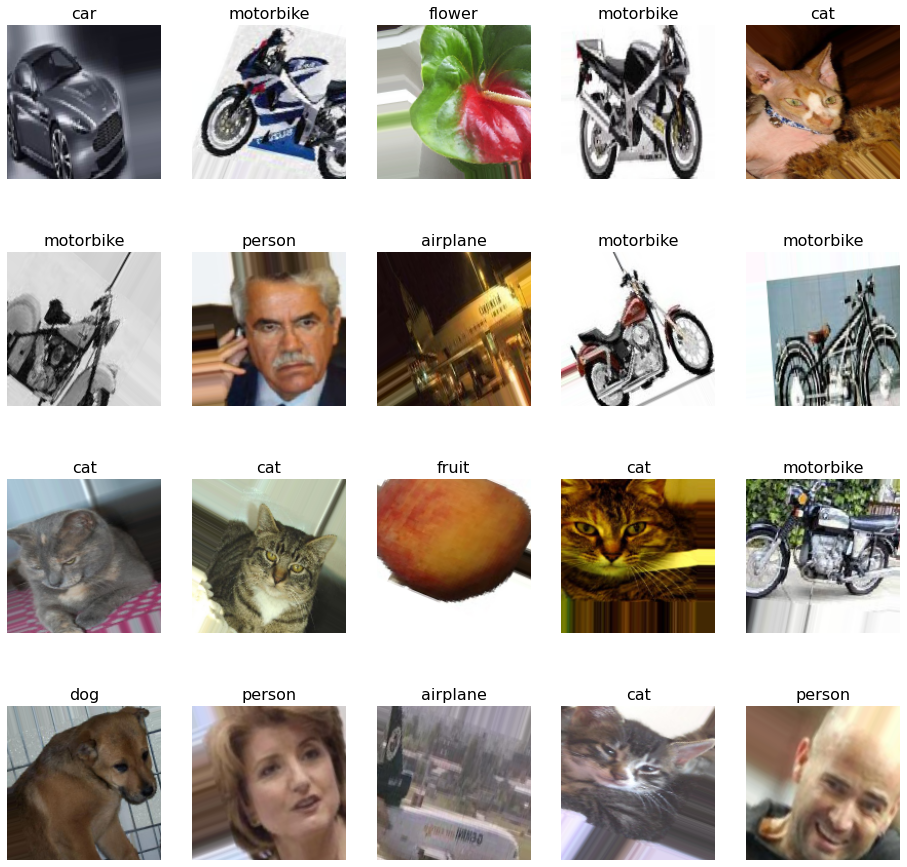

In [ ]:
imgs , labels = next(train_generator)
plots(imgs ,titles=labels)

In [ ]:
#step1 Initializing CNN
model=Sequential()

# step2 adding 1st Convolution layer and Pooling layer
model.add(Conv2D(32,(5,5),activation='relu',input_shape=(150,150,3)))
model.add(MaxPool2D((2,2)))

# step3 adding 2nd convolution layer and pooling layer
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))

# step4 adding dropout
model.add(Dropout(0.5))

#step5 Flattening the layers
model.add(Flatten())

#step6 Full_Connection
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 146, 146, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 35, 35, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 78400)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               2

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator,steps_per_epoch=206, #datasize/batchsize 5522/20,
                              epochs=30,validation_data=val_generator,validation_steps=68)

Epoch 1/30
206/206 [==============================] - 1316s 6s/step - loss: 2.0460 - accuracy: 0.4046 - val_loss: 0.8854 - val_accuracy: 0.6882
Epoch 2/30
206/206 [==============================] - 43s 208ms/step - loss: 0.9896 - accuracy: 0.6501 - val_loss: 0.6771 - val_accuracy: 0.7669
Epoch 3/30
206/206 [==============================] - 43s 206ms/step - loss: 0.8497 - accuracy: 0.6948 - val_loss: 0.7620 - val_accuracy: 0.7471
Epoch 4/30
206/206 [==============================] - 42s 206ms/step - loss: 0.7978 - accuracy: 0.7136 - val_loss: 0.5773 - val_accuracy: 0.7824
Epoch 5/30
206/206 [==============================] - 42s 206ms/step - loss: 0.7367 - accuracy: 0.7408 - val_loss: 0.7077 - val_accuracy: 0.7743
Epoch 6/30
206/206 [==============================] - 43s 207ms/step - loss: 0.7150 - accuracy: 0.7429 - val_loss: 0.4998 - val_accuracy: 0.8206
Epoch 7/30
206/206 [==============================] - 42s 205ms/step - loss: 0.6451 - accuracy: 0.7690 - val_loss: 0.4803 - val_acc

In [ ]:
model.save("model.h5")

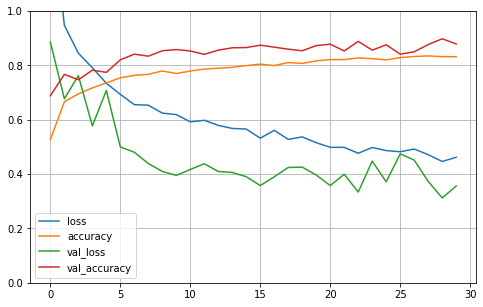

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()